In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from itertools import product
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Markdown
def print_markdown(string):
    display(Markdown(string))
def printmd(string):
    display(Markdown(string))

# <mark>Game theory</mark>


A **game** in strategic form is a triplet $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$ where:
- $\mathcal V$ is the finite set of **players**
- $\mathcal A$ is the set of **actions** available to each player. Actions $x_i \in \mathcal A$ chosen  by each player are collected in a vector $x = (x_1,x_2, \ldots, x_n)$ called **configuration** of the game. We denote the set of all configurations by $\mathcal X = \mathcal A^{\mathcal V}$.
- for each player $i \in \mathcal V$, the utility function $u_i: \mathcal X \rightarrow \mathbb{R}$ describes the **payoff** the player gets in each configuration: the utility of a player depends on its own action but also on the actions of other players.	

To each player $i \in \mathcal V$ we associate a **best response** function, which gives, for each configuration of the other players, the best action for $i$ (i.e., the actions that maximize its utility). Let $x_{-i}$ denote the vector strategies played by all players but $i$, and let $\mathcal B$ denote the best response function, i.e.,

$$
\mathcal B_i(x_{-i})= \arg\max_{x_i \in \mathcal A} u_i(x_i,x_{-i})
$$

A (pure strategy) **Nash equilibrium** is a configuration $x^* \in \mathcal X$ such that

$$
x_i^* \in \mathcal B_i (x^*_{-i}), \quad \forall i \in \mathcal V
$$

A game is **potential** if there exists a potential function $\Phi: \mathcal X \rightarrow \mathbb{R}$ which describes the way the utility function of each player changes when that player unilaterally varies its action. That is, $\forall i \in \mathcal V$, $\forall x,y \in \mathcal X$

$$
x_{-i}=y_{-i} \implies u_i(y)-u_i(x) = \Phi(y)-\Phi(x)
$$

# <span style="background-color: #00FF00">Discrete time best response dynamics</span>
In this section we present and analyze a first game-theoretic learning process, the discrete time best response dynamics.

Consider a game $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$. 

The **discrete-time asynchronous best response dynamics** is a Markov chain $X(t)$ with state space $\mathcal X= \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game.
At time instant $t$, when the chain is in $X(t)$, one player $i$ is selected uniformly at random in $\mathcal V$ and she changes her action to a best response chosen uniformly at random in the set $B_i(X(t)_{-i})$.

In other words, the best response dynamics is random walk on the transition graph $\mathcal G_{B}$, i.e., the graph with nodes corresponding to configurations $\mathcal X=\mathcal A^{\mathcal V}$ and links $(x,y)$ from configurations $x$ and $y$ that differ in exactly one entry $i$ if and only if $y_i \in B_i(x_{-i})$.

## Example: Rock-Scissor-Paper game
The Rock-Scissor-Paper game is a two-player symmetric game with action set $\mathcal A =\{R, S, P\}$ and utility matrix

![utility-matrix](RSP-utility.png)

In [2]:
# Define players vector
V = [1,2]
printmd("$\mathcal{V}$=")
print(V)

# Define action vector
# we identify actions with numbers: R->0, S->1, P->2

A = {}
A['R'] = 0
A['S'] = 1
A['P'] = 2
A_rev = dict((v,k) for k,v in A.items())
printmd("$\mathcal{A}$=")
for a in A:
    print(a + ": " + str(A[a]))


actions = np.array(list(A.values()))

# Define utility matrix
# first index is the player whose utility is being computed 0=first/row player,
# 1=second/column player,
# second index is the first player action 0=R, 1=S, 2=P,
# third index is the second player action 0=R, 1=S, 2=P
utility = np.array([[[0, 1, -1],
                     [-1, 0, 1],
                     [1, -1, 0]],
                    [[0, -1, 1],
                     [1, 0, -1],
                     [-1, 1, 0]]
                   ])

printmd("$\mathcal{u}_i$, $i \in \mathcal V$:")
for i in range(utility.shape[0]):
    for j in range(utility.shape[1]):
        for k in range(utility.shape[2]):
            printmd("$\mathcal{u}_" + str(i+1) + "(x) = " + str(utility[i,j,k]) + "$")
            printmd("&nbsp;&nbsp;&nbsp;&nbsp;with $x = $")
            df = pd.DataFrame(data=[A_rev[j],A_rev[k]], index=V, columns=['action'])
            df.index.name = 'player'
            display(df)
            print()

$\mathcal{V}$=

[1, 2]


$\mathcal{A}$=

R: 0
S: 1
P: 2


$\mathcal{u}_i$, $i \in \mathcal V$:

$\mathcal{u}_1(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           R

$\mathcal{u}_1(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           S

$\mathcal{u}_1(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           P

$\mathcal{u}_1(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           R

$\mathcal{u}_1(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           S

$\mathcal{u}_1(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           P

$\mathcal{u}_1(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           R

$\mathcal{u}_1(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           S

$\mathcal{u}_1(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           P

$\mathcal{u}_2(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           R

$\mathcal{u}_2(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           S

$\mathcal{u}_2(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           R
2           P

$\mathcal{u}_2(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           R

$\mathcal{u}_2(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           S

$\mathcal{u}_2(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           S
2           P

$\mathcal{u}_2(x) = -1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           R

$\mathcal{u}_2(x) = 1$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           S

$\mathcal{u}_2(x) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;with $x = $

action
player       
1           P
2           P



1. Write a function that implements the best response correspondence for both players.
2. Does the game admit Nash equilibria?
3. Is the game potential?
4. Consider the best response dynamics for the RSP game. Plot the transition graph $\mathcal G_{B}$.
5. Simulate the (discrete time) best response dynamics and estimate the invariant probability distribution $\pi$.
6. Compute and plot the condensation graph of $\mathcal G_{B}$.
7. Compute analytically the invariant distribution $\pi$ of the best response dynamics.


> 1. Write a function that implements the best response for both players.

In [3]:
# Best response function for 2 player games 
def best_response(player, configuration):
    # if player == 1, other_player = 0 (and viceversa)
    other_player = 1-player
    # other action is the action of the other player
    other_action = configuration[other_player]
    if player == 0:
        # if player == 0, player 0 looks at the action of player 1 (other_action) and chooses BR (2nd index)
        return [np.argmax(utility[player, :, other_action])]
    if player == 1:
        # if player == 1, player 1 looks at the action of player 0 (other_action) and chooses BR (3nd index)
        return [np.argmax(utility[player, other_action, :])]

for player in V:
    if player-1==0:
        otherPlayer_configurations = list(product([-1], actions))
    else:
        otherPlayer_configurations = list(product(actions, [-1]))
    for conf in otherPlayer_configurations:
        BR = best_response(player-1, conf)[0]
        printmd("$\mathcal{B}_" + str(player) + "(x_{-" + str(player) + "}) = " + str(A_rev[BR]) + "$")
        printmd("&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-" + str(player) + "}= $")
        other_player = 1-(player-1)
        df = pd.DataFrame(data=[A_rev[conf[other_player]]], index=[V[other_player]], columns=['action'])
        df.index.name = 'player'
        display(df)
        print()

$\mathcal{B}_1(x_{-1}) = P$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-1}= $

action
player       
2           R

$\mathcal{B}_1(x_{-1}) = R$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-1}= $

action
player       
2           S

$\mathcal{B}_1(x_{-1}) = S$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-1}= $

action
player       
2           P

$\mathcal{B}_2(x_{-2}) = P$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-2}= $

action
player       
1           R

$\mathcal{B}_2(x_{-2}) = R$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-2}= $

action
player       
1           S

$\mathcal{B}_2(x_{-2}) = S$

&nbsp;&nbsp;&nbsp;&nbsp;with $x_{-2}= $

action
player       
1           P

> 2. Does the game admit Nash equilibria?

In [6]:
# Compute all game's configurations
# product function computes the cartesian product of actions with itself
# returns an iterator of tuples of actions
configurations = list(product(actions, repeat=2))
print("Configurations:")

for conf in configurations:
    printmd("&nbsp;&nbsp;&nbsp;&nbsp;$x = $")
    df = pd.DataFrame(data=[A_rev[conf[0]],A_rev[conf[1]]], index=V, columns=['action'])
    df.index.name = 'player'
    display(df)
    print()
nash_list = []

# we cycle over configurations:
# each configuration is a Nash unless there exists (at least) one player who
# is not playing a best response to the configuration of other players
for configuration in configurations:
    is_nash = True
    for player in [i-1 for i in V]:
        if configuration[player] not in best_response(player,configuration):
            is_nash = False
            break
    if is_nash:
        nash_list.append(configuration)
        
if len(nash_list) != 0:
    print("The game admits the following Nash equilibria", nash_list)
else:
    print("The game does not posses Nash equilibria.")

Configurations:


&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           R
2           R

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           R
2           S

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           R
2           P

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           S
2           R

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           S
2           S

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           S
2           P

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           P
2           R

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           P
2           S

&nbsp;&nbsp;&nbsp;&nbsp;$x = $

action
player       
1           P
2           P


The game does not posses Nash equilibria.


The game does not posses any Nash equilibrium. In each configuration at least one player has an incentive in changing is current action to a best response, which gives him utility $+1$. There are no configurations where both players have utility $+1$.

> 3. Is the game potential?

If a finite game (i.e., a  game with a finite configuration set) is potential, then the set of its Nash equilibria is non-empty as it contains the maxima of the potential function $\Phi$ (at least a maximum exists due to Weierstrass' theorem).
The RSP game does not posses Nash equilibria, so it is not potential.

> 4. Consider the best response dynamics for the RSP game. Plot the transition graph $\mathcal G_{B}$ (i.e., the graph with nodes corresponding to configurations $\mathcal X=\mathcal A^{\mathcal V}$ and links $(x,y)$ between configurations $x$ and $y$ that differ in exactly one entry $i$ if and only if $y_i \in B_i(x_{-i})$).

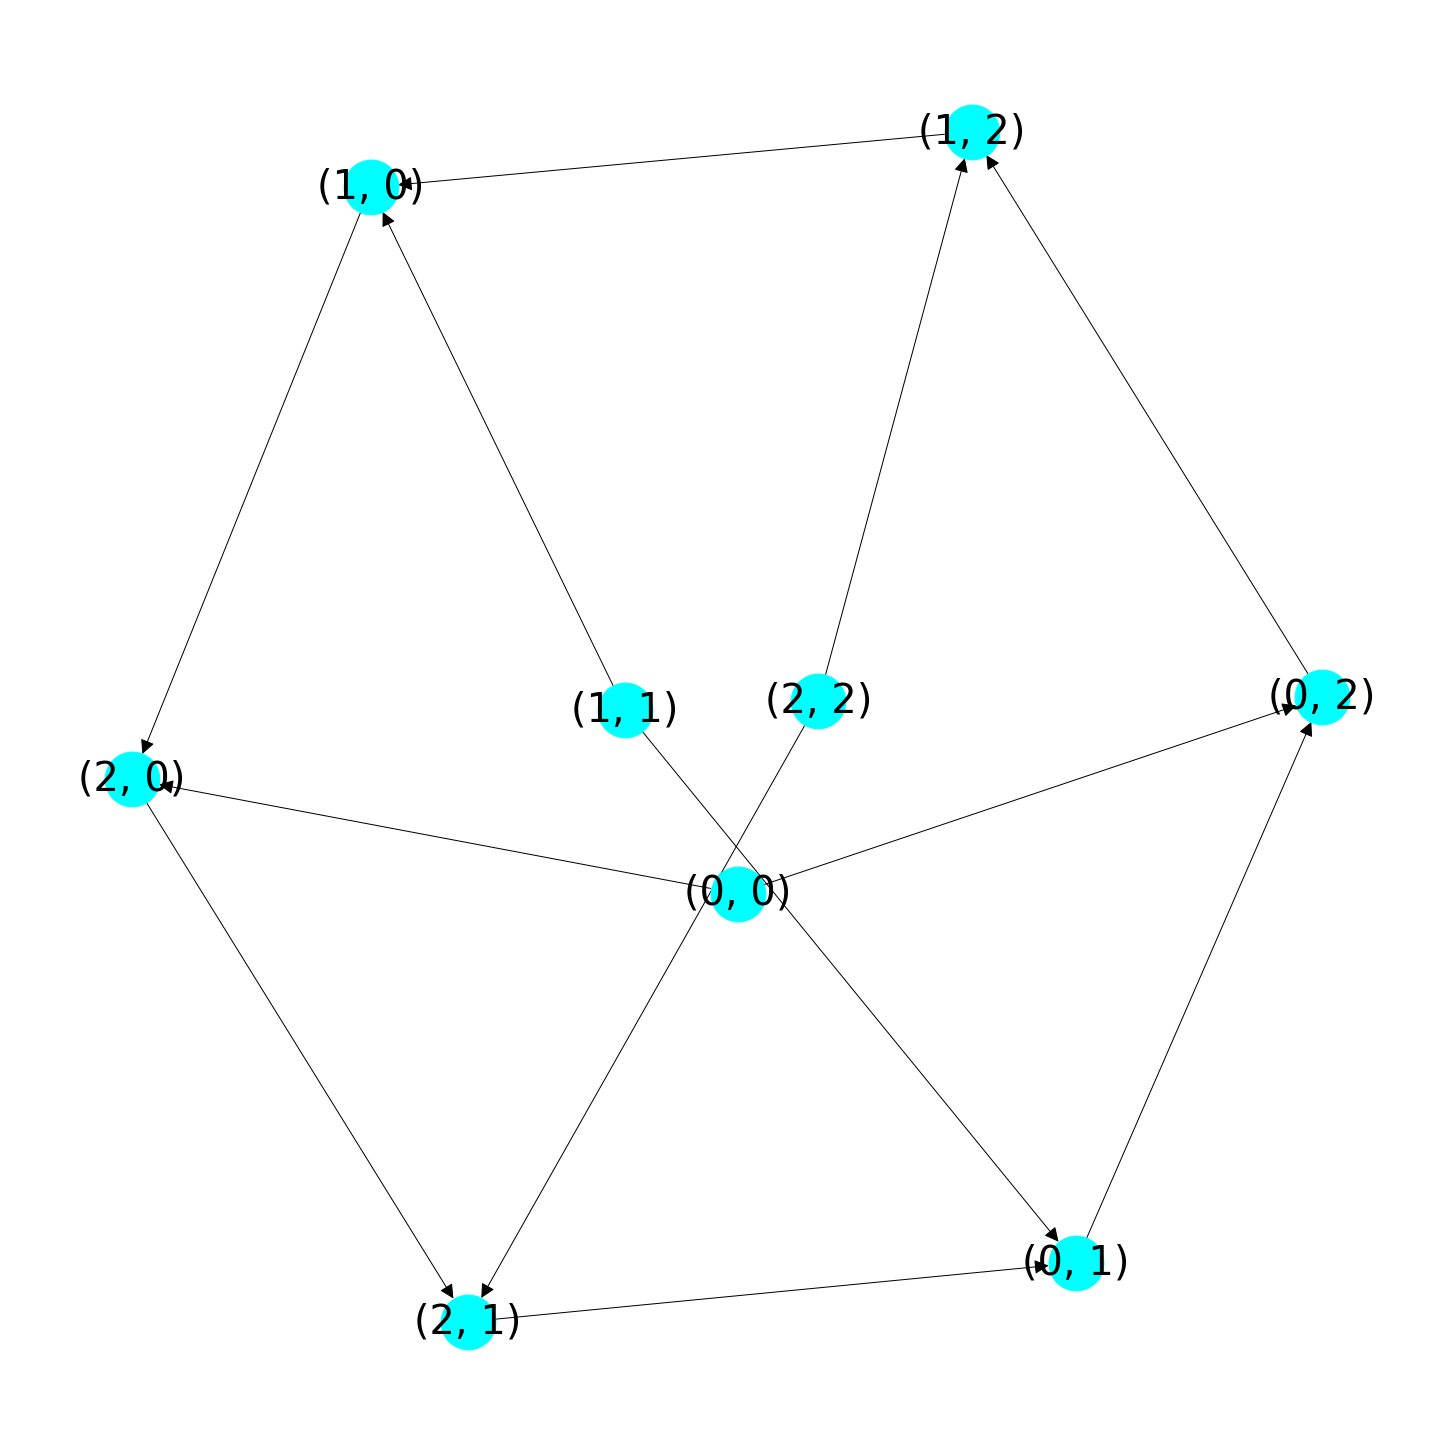

In [8]:
import networkx as nx

# transition_graph is a directed graph
transition_graph = nx.DiGraph()
# nodes of transition_graph are configurations
transition_graph.add_nodes_from(configurations)

# we visit each configuration x and add links to neighboring configurations.
# Neighboring configurations y of x are those that differ in exactly one entry,
# the action of a single player i, and such that y_i is a best response to
# x_i for player i
for configuration in configurations:
    for player in [0,1]:
        for other_action in actions:
            # selects other action in best response, but no selfloops
            if other_action != configuration[player] and other_action in best_response(player,configuration):
                other_config = list(configuration)
                other_config[player] = other_action
                other_config = tuple(other_config)
                transition_graph.add_edge(configuration,other_config)
                
pos = nx.spring_layout(transition_graph)
plt.figure(figsize=(20, 20))
nx.draw(transition_graph, pos, node_color='#00ffff', arrowsize=30, node_size=3000, font_size=40, with_labels=True)    

The transition graph has nodes corresponding to the game configurations, and directed links which represent admissible transitions for the best response dynamics. 

> 5. Simulate the (discrete time) best response dynamics and estimate the invariant probability distribution $\pi$.

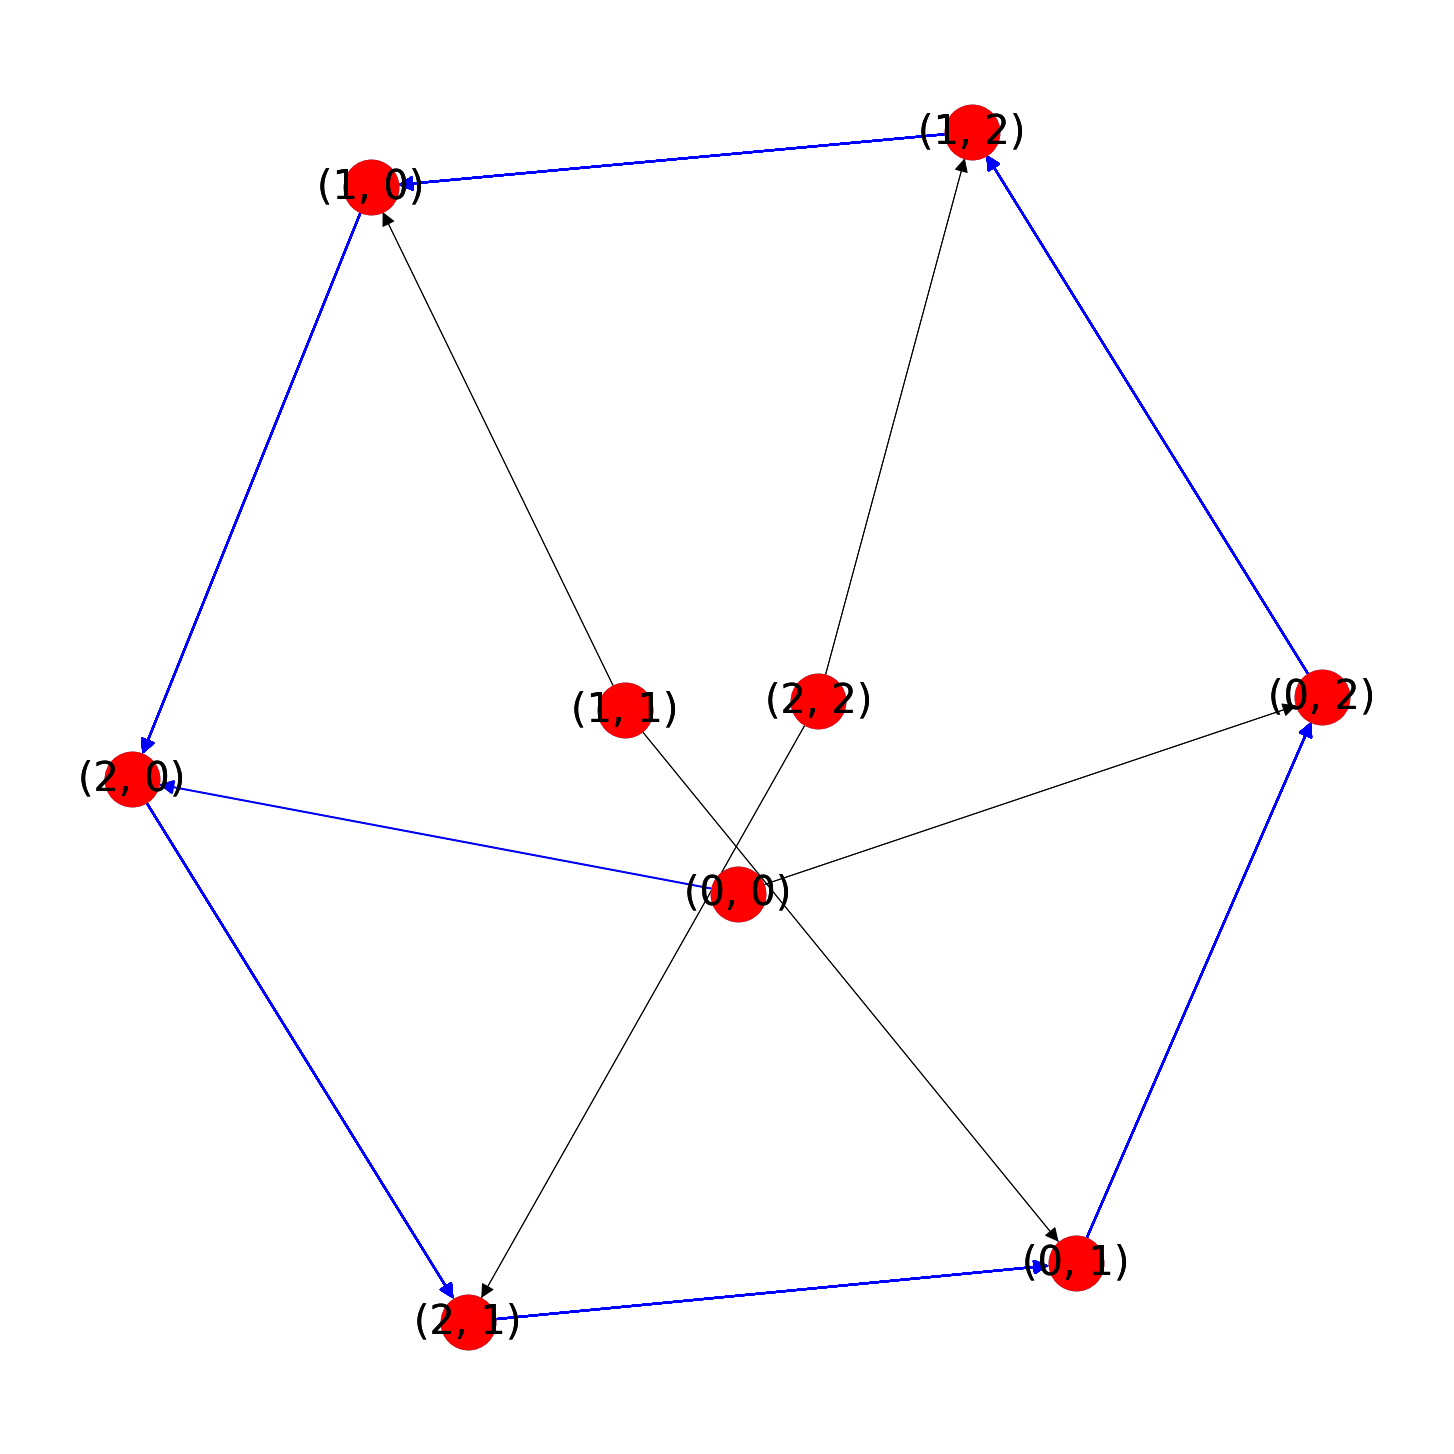

In [9]:
from numpy.random import choice, rand 

# Simulates the best response dynamics as a random walk on the transition graph G
# starting from node xi.
# if till_first_return = True the random walk stops the first time
# it returns to the starting node xi.
# Otherwise, it goes on for num_steps steps.

def RandomWalk(G, xi, num_steps, till_first_return = False):
    # nodeSeq stores the sequence of visited nodes
    nodeSeq = []
    nodeSeq.append(xi)
    
    # if the walk ends at the first return to xi
    if till_first_return:
        # stores the initial position to check if the 
        # walk returns to it
        x_init = xi
        
        while True:
            # compute the next visited node xi by chosing uniformly
            # at random a neighbor of the current one
            neighbors = list(G.neighbors(xi))
            index = choice(len(neighbors),1)[0] 
            xi = neighbors[index] 
            nodeSeq.append(xi)
            
            # check if the walk has returned to the starting node
            # if so, end the walk
            if xi == x_init:
                return nodeSeq
    
    # if the walk ends after num_steps steps
    else:
        for i in range(num_steps):
            neighbors = list(G.neighbors(xi))
            index = choice(len(neighbors),1)[0] 
            xi = neighbors[index]
            nodeSeq.append(xi)
        return nodeSeq

# Simulate the BR dynamics 
nodeSeq = RandomWalk(transition_graph, xi=(0,0), num_steps=100, till_first_return=False)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]

plt.figure(figsize=(20, 20))
# Draw G and represent the random walk by colouring the edge sequence
# first draw all nodes and links
nx.draw(transition_graph, pos)
nx.draw(transition_graph, pos, arrowsize=30, node_size=3000, font_size=40, with_labels=True)    
# then, on the previous picture, add node labels and highlight the edge sequence
nx.draw(transition_graph, pos, arrowsize=30, node_size=3000, font_size=40, with_labels=True, edgelist = edgeSeq, edge_color='blue', node_color='red', width=2)

We see that the dynamics starts at configuration $(R,R)$ (represented by $(0,0)$) and after one step it leaves it. Then it continues cycling over best response cycle $(0,2) \to (1,2) \to (1,0) \to (2,0) \to (2,1) \to (0,1) \to (0,2)$. In particular, it never goes back to $(0,0)$ and $(1,1),(2,2)$ are never visited.

In [10]:
# Estimate the invariant measure pi of the BR dynamics by 
# simulating a "long" random walk

nodeSeq = RandomWalk(transition_graph, (0,0), 10000, False)

# Compute empirical frequencies

# Define a dictionary to store frequencies of visit to each node and initialize each frequency to 0
frequencies = {node:0 for node in transition_graph.nodes}
# count the visits to each node
for node in nodeSeq:
    frequencies[node] += 1
# transform dict values to a np.array
frequencies = list(frequencies[node] for node in transition_graph.nodes) 
frequencies = np.array(frequencies, dtype="double")
# normalize the counts to obtain frequencies
frequencies /= len(nodeSeq)
print("Frequencies:", frequencies, "\n")

# Print the indices of nodes where pi is positive
print("The approximate invariant distribution is supported on nodes:")
for index,node in enumerate(transition_graph.nodes):
    if frequencies[index]>0:
        print(node)

Frequencies: [9.99900010e-05 1.66583342e-01 1.66683332e-01 1.66683332e-01
 0.00000000e+00 1.66683332e-01 1.66683332e-01 1.66583342e-01
 0.00000000e+00] 

The approximate invariant distribution is supported on nodes:
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 2)
(2, 0)
(2, 1)


The approximate invariant distribution appears to be supported on nodes $\{(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)\}$ of the transition graph. However, the measure of node $(0,0)$ is negligible with respect to that of $(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)$, which are almost equal to each other. Actually, the little weight associated to node $(0,0)$ appears to depend on the fact that it has been visited once since it is the starting point of the chain. We guess that when the length on the walk tends to infinity the weight associated to node $(0,0)$ vanishes and the approximation of $\pi$ is supported and uniformly distributed on $\{(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)\}$.

> 6. Compute and plot the condensation graph of $\mathcal G_{B}$.

{0: {'members': {(0, 1), (1, 2), (2, 1), (2, 0), (0, 2), (1, 0)}}, 1: {'members': {(0, 0)}}, 2: {'members': {(1, 1)}}, 3: {'members': {(2, 2)}}}


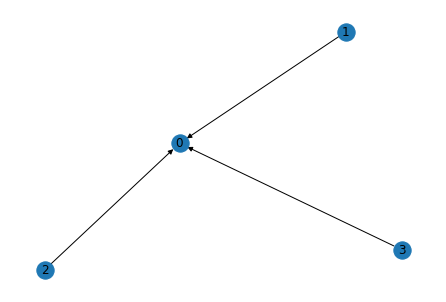

In [11]:
CG = nx.algorithms.components.condensation(transition_graph)
nx.draw(CG, with_labels=True)
print(dict(CG.nodes))

The condensation graph is shown above, where the hypernode $0$ contains all configurations but $(R,R), (S,S), (P,P)$ (the ones that correspond to a draw outcome). More precisely, the hypernode $0$ contains the $6$-cycle $(0,2) \to (1,2) \to (1,0) \to (2,0) \to (2,1) \to (0,1) \to (0,2)$. The hypernodes $1,2,3$ instead contain the singletons $(R,R), (S,S), (P,P)$. The condensation graph contains only one sink, that is $s_{\text{transition_graph}} = 1$.

7. Compute analytically the invariant distribution $\pi$ of the best response dynamics.

We know that the invariant probability distribution is supported on the nodes contained in the unique sink of the condensation graph. <span style="background-color: #00FFFF">The subgraph corresponding to such sink is balanced (all nodes have in-degree $1$ and out-degree $1$, so the sink is $1$-regular), then the extremal invariant probability distribution supported on that sink is obtained by normalizing the out-degree vector.</span> In this way we find that $\pi_x = 1/6$, for $x \in \{RS, RP, SR, SP, PR, PS\}$ and $\pi_x = 0$ for $x \in \{RR, SS, PP\}$.

We can check that this is correct with the following code.

In [12]:
# Compute P matrix
A = nx.adjacency_matrix(transition_graph) # -> return type is scipy.sparse.csr_matrix
A = A.toarray() # convert A to a numpy array
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A

# Compute invariant distribution
values,vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:,index].real
pi = pi/np.sum(pi)
print("pi=", pi)

pi= [-0.          0.16666667  0.16666667  0.16666667 -0.          0.16666667
  0.16666667  0.16666667 -0.        ]


## <span style="background-color: #FCFD0F">When a game is potential</span>

In previous exercise, it was asked whether the RSP is a potential game. To answer this question, we used the fact that every potential game admits at least a (pure strategy) Nash equilibrium. Since this is not the case for RSP, the game is not potential. An alternative way to address this question is to use the following characterization.

**Theorem**: consider a game $u =\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$ and a finite path $\gamma = (x_0, x_1, \ldots, x_N)$ in the configuration graph of the game. Let

$$
I(\gamma, u)= \sum_{k=1}^{N}[u_{i_k}(x_k) - u_{i_k}(x_{k-1})]
$$

where $i_k$ is the only player that modifies her action at time-step $k$, i.e., $(x_k)_{i_k} \neq (x_{k-1})_{i_k}$ e $(x_k)_{-i_k} = (x_{k-1})_{-i_k}$.The following statements are equivalent:
- a game is potential.
- $I(\gamma, u)=0$ for all finite closed path in the configuration graph.
- $I(\gamma, u)=0$ for all simple (i.e., it does not have repeating vertices) closed path with length 4 in the configuration graph.

**Exercise**: we consider a 2-players game with $\mathcal{A} = \{0,1\}$. The payoffs are in the table below.

![utility-matrix2](game22.png)

For what parameters the game is potential?

**Solution**: consider the simple path $\gamma_1 = ((0,0),(1,0),(1,1),(0,1),(0,0))$.

Along this path, 

$$I(\gamma_1,u) = (2-0) + (b-a) + (c-4) + (0-(-1)) = -1-a+b+c.$$

It is easy to observe that for every other closed path $\gamma_i$ with length 4,

$$I(\gamma_i,u) = I(\gamma_1,u) \quad \text{or} \quad I(\gamma_i,u) = -I(\gamma_1,u),$$

thus we can apply the theorem to state that the game is potential if and only if

$$
I(\gamma_1,u)=-1-a+b+c = 0.
$$

Let us consider for example the case $a=c=0, b=1$, under which the game is potential. The game is

|   | 0   | 1   |
|---|-----|-----|
| **0** | 0,0 | 0,-1 |
| **1** | 2,0 | 4,1 |

It is easy to see that $(1,1)$ is a Nash equilibrium for the game.

If one considers instead the case $c=5, a=-4, b=-2$, which does not satisfy the sufficient and necessary condition for the game being potential.

|   | 0   | 1   |
|---|-----|-----|
| **0** | 0,0 | 5,-1 |
| **1** | 2,-4 | 4,-2 |

The game is not potential, as proved by the fact that it does not admit Nash equilibria.

Still, it may be that a game with Nash equilibria is not potential, as for instance $c=-2, a=-4, b=-2$.

|   | 0   | 1   |
|---|-----|-----|
| **0** | 0,0 | -2,-1 |
| **1** | 2,-4 | 4,-2 |

For this game indeed $(1,1)$ is a Nash equilibrium

## <span style="background-color: #00FF00">Continuous time best response dynamics</span>
In this section we present the continuous time best response dynamics, which is the continuous time analog of the process presented in the previous section.

Consider a game $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$. 

The **continuous-time asynchronous best response dynamics** is a continuous time Markov chain $X(t)$ with state space $\mathcal X= \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game and transition rate matrix $\Lambda$ as follows: 

$\Lambda_{xy} = 0$ for every two configurations $x, y \in \mathcal X$ that differ in more
than one entry, and

$$
\Lambda_{xy} = \begin{cases}
|B_i(x_{-i})|^{-1} \quad &\text{if} \quad y_i \in B_i(x_{-i}) \\
0 \quad &\text{if} \quad y_i \notin B_i(x_{-i})
\end{cases}
$$

for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$.

## <span style="background-color: #00FA9A">Continuous-time best response dynamics in potential games</span>

**Proposition**: consider a potential game, and let $\mathcal{N}$ the set of the Nash equilibria. Then, for every distribution of initial configuration $X(0)$, the best response dynamics converges to $\mathcal{N}$ in finite time with probability 1. 

**Remark**: Convergence is in fact insured to a particular subset of NE, that is the one consisting of the nodes of all the sink connected components of the underlying transition graph of the Markov process. In the sequel we denote such subset as $\mathcal{N}_\infty$: it is a trapping set and actually the largest trapping set inside $\mathcal{N}$. We call $\mathcal{N}_\infty$ the set of **recurrent Nash equilibria**. Notice that in those special cases when $\mathcal{N}_\infty$ coincides with $\text{argmax}(\Phi(x))$, we actually have that the BR dynamics converges to the subset of Nash equilibria consisting of the maxima of the potential. However, this is not always the case.

The continuous-time best response dynamics has a similar behaviour to discrete-time asynchronous best-response. We do not implement here the continuous-time best response dynamics. We instead focus on **continuous-time noisy best reponse dynamics**.

## <span style="background-color: #98FB98">Continuous-time noisy best response dynamics</span>

We consider a **continuous time asynchronous noisy best response  dynamics** with inverse noise parameter $\eta$, i.e., a continuous time Markov chain on the configuration space $\mathcal X$ (the set of all game's configurations) with transition rates $\Lambda_{xy} = 0$ for every two configurations $x, y \in \mathcal X$ that differ in more
than one entry, and

$$
\Lambda_{xy} = \frac{\exp^{\eta u_i(y_i,x_{-i})}}{\sum_{a \in \mathcal A} \exp^{\eta u_i(a,x_{-i})} }
$$

for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$.


Note that the probability that a player chooses a certain strategy $x_i$ is non-decreasing (increasing, if $\eta > 0$) in the payoff associated to that strategy. In particular,

- if $\eta=0$, the players choose strategies independently of the associated payoff (infinite noise, the game basically disappears), i.e., for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$,

$$
\Lambda_{xy} = \frac{1}{|\mathcal{A}|}
$$

- if $\eta \to + \infty$, then the players randomize among optimal strategies, and assign probability $0$ to suboptimal ones (similar to best-response).

## <span style="background-color: #9ACD32">Continuous-time noisy best response dynamics in potential games</span>

The transition graph of the NBR is strongly connected for each value of $\eta$, i.e., from every configuration of strategies there is a non-null probability to reach any other configuration of strategies. In particular, for potential games, the NBR admits an invariant distribution

$$
\pi_x = \frac{e^{\eta \Phi(x)}}{Z_\eta}, \quad Z_\eta = \sum_{y\in \mathcal{X}} e^{\eta \Phi(y)}.
\tag{1}
$$

This is in contrast with best-response dynamics, which in potential games admits a trapping set of Nash equilibria $\mathcal{N}_\infty$ and converge to this set with probability 1 in finite time.

**Remark** Note that if $\eta \to +\infty$, the dynamics spends almost all the time in the global maximizers of the potential. However, global maximizers of the potential differ in general from $\mathcal{N}_\infty$ as defined above for best response dynamics.

## <span style="background-color: #FFA07A">Network games</span>

Network games are games where players are associated to nodes of a graph $\mathcal G$ that describes the interactions among them. In particular, for each player $i\in\mathcal V$ and for each couple of configurations $x,y\in\mathcal A^{\mathcal V}$ such that $x_j=y_j$ for each $j\in\ N_i\cup\{i\}$ it holds that

$$u_i(x)=u_i(y)$$

This means that the utility of each player only depends on the actions of its neighbors in the graph $\mathcal G$.


Given an unweighted undirected graph $\mathcal G=(\mathcal V,\mathcal E,W)$ we can construct a network game on it by setting the players’ utilities to coincide with the weighted sum of the payoffs of the same symmetric two-player game played by the player simultaneously with her neighbors.

Specifically, for a symmetric two-player game with action set $\mathcal A$ and utility function $\varphi(x_1, x_2)$ we define the network game $(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V} )$ by setting the utility of every player $i \in \mathcal V$ as
$$
u_i(x) = \sum_{j \in \mathcal V} W_{ij}\varphi(x_i,x_j)
$$

## Exercise - continuous time NBRD for network coordination game
A binary coordination game is a symmetric $2 \times 2$-game with action set $\mathcal A = \{0,1\}$ with payoff matrix $\varphi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a,a | d,c |
| **1** | c,d | b,b |

where $a > c$ and $b > d$. The inequalities above imply that the best response for each player is to copy the action of the other player.

Indeed:

$\mathcal X = \{x, y, z, w\}$, with:

$$
x = \begin{pmatrix}
0 \\ 0
\end{pmatrix},
y = \begin{pmatrix}
0 \\ 1
\end{pmatrix},
z = \begin{pmatrix}
1 \\ 0
\end{pmatrix},
w = \begin{pmatrix}
1 \\ 1
\end{pmatrix}.
$$

$$
\mathcal B_0(x_{-0})= 0, x_{-0}=(0)
$$
$$
\mathcal B_0(x_{-0})= 1, x_{-0}=(1)
$$
$$
\mathcal B_1(x_{-1})= 0, x_{-1}=(0)
$$
$$
\mathcal B_1(x_{-1})= 1, x_{-1}=(1)
$$

$x$ and $w$ are (pure strategy) Nash equlibria.



It is a potential game with potential $\phi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a-c | 0 |
| **1** | 0 | b-d |

Indeed:

$\mathcal X = \{x, y, z, w\}$, with:

$$
x = \begin{pmatrix}
0 \\ 0
\end{pmatrix},
y = \begin{pmatrix}
0 \\ 1
\end{pmatrix},
z = \begin{pmatrix}
1 \\ 0
\end{pmatrix},
w = \begin{pmatrix}
1 \\ 1
\end{pmatrix}.
$$

Considering $x, y$ and $i=1$: $x_{-1}=y_{-1}$ (valid since $0 = 0$) $\implies \varphi_1(y)-\varphi_1(x) = c-a = \phi(y)-\phi(x)$

Considering $x, z$ and $i=0$: $x_{-0}=z_{-0}$ (valid since $0 = 0$) $\implies \varphi_0(z)-\varphi_0(x) = c-a = \phi(z)-\phi(x)$

Considering $y, x$ and $i=1$: $y_{-1}=x_{-1}$ (valid since $0 = 0$) $\implies \varphi_1(x)-\varphi_1(y) = a-c = \phi(x)-\phi(y)$

Considering $y, w$ and $i=0$: $y_{-0}=w_{-0}$ (valid since $1 = 1$) $\implies \varphi_0(w)-\varphi_0(y) = b-d = \phi(w)-\phi(y)$

Considering $z, x$ and $i=0$: $z_{-0}=x_{-0}$ (valid since $0 = 0$) $\implies \varphi_0(x)-\varphi_0(z) = a-c = \phi(x)-\phi(z)$

Considering $z, w$ and $i=1$: $z_{-1}=w_{-1}$ (valid since $1 = 1$) $\implies \varphi_1(w)-\varphi_1(z) = b-d = \phi(w)-\phi(z)$

Considering $w, y$ and $i=0$: $w_{-0}=y_{-0}$ (valid since $1 = 1$) $\implies \varphi_0(y)-\varphi_0(w) = d-b = \phi(y)-\phi(w)$

Considering $w, z$ and $i=1$: $w_{-1}=z_{-1}$ (valid since $1 = 1$) $\implies \varphi_1(z)-\varphi_1(w) = d-b = \phi(z)-\phi(w)$

Solving the system of equation:


In [13]:
from sympy import *
var('phi_x phi_y phi_z phi_w a b c d')
eqns = [phi_y-phi_x-c+a, phi_z-phi_x-c+a, phi_w-phi_y+d-b, phi_w-phi_z+d-b]
solve(eqns, [phi_x,phi_y,phi_z,phi_w])

{phi_x: a - b - c + d + phi_w, phi_y: -b + d + phi_w, phi_z: -b + d + phi_w}

Setting $w = b-d$:

$$
\phi(x) = a-c
$$
$$\phi(y) = 0
$$
$$\phi(z) = 0
$$
$$\phi(w) = b-d
$$

Thus, there exists a potential function $\phi: \mathcal X \rightarrow \mathbb{R}$ such that, $\forall i \in \mathcal V$, $\forall x,y \in \mathcal X$:

$$
x_{-i}=y_{-i} \implies \varphi_i(y)-\varphi_i(x) = \phi(y)-\phi(x)
$$

Note that the maxima of the potential function are $x$ or $w$, depending on the choice of $a,b,c,d$. They both are contained in the set of Nash equilibria (the game is finite and potential).

Consider the **network coordination game**, obtained combining binary coordination games on the link of the following undirected graph

![network](network.png)

Recall that such network game is potential with potential function $\Phi$

$$
\Phi(x) = \frac{1}{2} \sum_{i,j} W_{ij} \phi(x_i,x_j) .
$$

1.  Simulate the dynamics with $\eta=2$ when the coordination game has the same utility value for coordination of action 0 and action 1 respectively, i.e., $a=b=1$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?
2. Simulate the dynamics when  instead $a=1$, $b=\frac{1}{2}$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?
3. If the simulation continues for a long time, will the probability for different configurations converge towards some specific values? In that case, how can these be computed?
4. Compute the ratio between the probability that after a long time (i.e., in stationarity) all nodes choose action 1 and the probability that all nodes choose action 0, both for case **1** and case **2**. Does this seem to agree with your simulations?
5. Compute the ratio between the probability that after a long time (i.e., in stationarity) one node chooses action 1 and the rest choose action 0, and the probability that all nodes choose action 0, both for case **1** and case **2**.


### Solution
#### Step 1
> Simulate the dynamics when the coordination game has the same utility value for coordination of action 0 and action 1 respectively, i.e., $a=b=1$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?

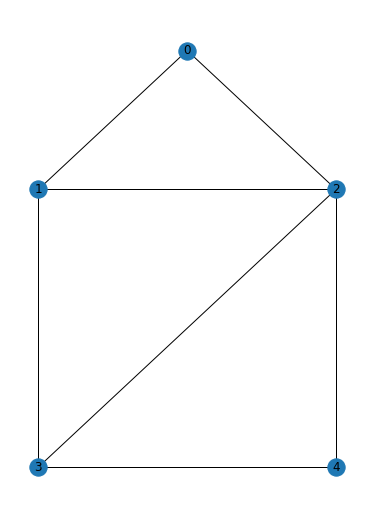

In [3]:
# Construct the undirected graph as shown in the picture
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edges_from([
    (0,1),(0,2),
    (1,2),(1,3),
    (2,3),(2,4),
    (3,4)
])

plt.figure(figsize=(5,7))
pos = {3: (0, 0), 4: (1, 0), 1: (0, 1), 2: (1, 1), 0: (0.5, 1.5)}
nx.draw(G, pos=pos, with_labels=True)

In [4]:
# Define the network coordination game

# number of nodes in G = number of players in the game
n_players = len(G)
# utility values
a = 1
b = 1
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 2
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [5]:
import scipy as sp

# Define the noisy best response dynamics

# Initialize transition rates matrix
n_config = n_actions**n_players
Lambda = sp.sparse.lil_matrix((n_config,n_config))

# Number of actions for each player
n_states =tuple(n_actions for _ in range(n_players))

# Fill transition rates matrix
for x_id in range(n_config):
    x = np.unravel_index(x_id,shape=n_states)
    x = np.array(x)
    for player in range(n_players):
        # compute utilities gained by `player` for each of its possible actions
        # while the other players are in the current configuration x
        utilities = np.zeros(n_actions)
        for action in actions:
            y = np.array(x)
            y[player] = action
            utilities[action] = utility(player,y,phi)
        # exp_utilities contains the exponential of utilities of 'player' for each possibile action
        exp_utilities = np.exp(eta*utilities)
        for action in actions:
            # there are no selfloops 
            if action == x[player]:
                continue
            y = np.array(x)
            y[player] = action
            y_id = np.ravel_multi_index(tuple(y), dims = n_states)
            # add a non-zero rate from x to y proportional to payoff of player when playing action (configuration is y)
            Lambda[x_id, y_id] += exp_utilities[action] / np.sum(exp_utilities)
            
printmd("$\Lambda$: " + str(n_config) + " x " + str(n_config) + " matrix")
for x in range(n_config):
    for y in range(n_config):
        x_s = np.array(np.unravel_index(x,shape=n_states))
        y_s = np.array(np.unravel_index(y,shape=n_states))
        printmd("$\Lambda_{x,y}$ = " + str(Lambda[x,y]))
        printmd("with $x = $")
        df = pd.DataFrame(data=x_s, index=np.arange(len(G)), columns=['state'])
        df.index.name = 'player'
        display(df)
        printmd("with $y = $")
        df = pd.DataFrame(data=y_s, index=np.arange(len(G)), columns=['state'])
        df.index.name = 'player'
        display(df)
        print("\n")

$\Lambda$: 32 x 32 matrix

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0003353501304664781

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9996646498695335

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           0
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           1
1           0
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9996646498695335

with $x = $

state
player       
0           1
1           1
2           0
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.8807970779778824

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.5

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9975273768433652

with $x = $

state
player       
0           1
1           1
2           1
3           0
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.11920292202211756

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.9820137900379085

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           0

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           0
1           1
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           0
2           1
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           0
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           0

$\Lambda_{x,y}$ = 0.0003353501304664781

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           0
3           1
4           1

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           0

$\Lambda_{x,y}$ = 0.0024726231566347743

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           0
4           1

$\Lambda_{x,y}$ = 0.01798620996209156

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           0

$\Lambda_{x,y}$ = 0.0

with $x = $

state
player       
0           1
1           1
2           1
3           1
4           1

with $y = $

state
player       
0           1
1           1
2           1
3           1
4           1

In [6]:
# Simulate the continuous time Markov chain with 2nd approach: local clocks
w = np.sum(Lambda, axis=1)

# reshape w
w = np.array(w.T)[0]
for x, weight in enumerate(w):
    # add selfloop if a configuration is a sink, otherwise D is not well defined
    if weight == 0:
        Lambda[x,x] = 1
        w[x] = 1
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# number of iterations
n_steps = 100

states = np.zeros(n_steps, dtype=int)
# initial configuration is random
x = np.random.choice(actions, size = n_players)
x_id = np.ravel_multi_index(tuple(x), dims = n_states)
states[0] = x_id

transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[states[0]]

for i in range(1,n_steps):
    states[i] = np.random.choice(n_config, p=P[states[i-1],:])
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[states[i]]

Potential along the simulated path of the chain:


Jump step 0
state:


state
player       
0           1
1           0
2           1
3           0
4           0

POTENTIAL: 1.5

Jump step 1
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 2
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 3
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 4
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 5
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 6
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 7
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 8
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 9
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 10
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 11
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 12
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 13
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 14
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 15
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 16
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 17
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 18
state:


state
player       
0           1
1           1
2           0
3           0
4           0

POTENTIAL: 2.0

Jump step 19
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 20
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 21
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 22
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 23
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 24
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 25
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 26
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 27
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 28
state:


state
player       
0           0
1           0
2           0
3           1
4           1

POTENTIAL: 2.0

Jump step 29
state:


state
player       
0           0
1           0
2           0
3           1
4           0

POTENTIAL: 2.0

Jump step 30
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 31
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 32
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 33
state:


state
player       
0           0
1           1
2           0
3           0
4           0

POTENTIAL: 2.0

Jump step 34
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 35
state:


state
player       
0           0
1           1
2           0
3           0
4           0

POTENTIAL: 2.0

Jump step 36
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 37
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 38
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 39
state:


state
player       
0           0
1           1
2           0
3           0
4           0

POTENTIAL: 2.0

Jump step 40
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 41
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 42
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 43
state:


state
player       
0           0
1           0
2           0
3           1
4           0

POTENTIAL: 2.0

Jump step 44
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 45
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 46
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 47
state:


state
player       
0           0
1           0
2           0
3           1
4           0

POTENTIAL: 2.0

Jump step 48
state:


state
player       
0           0
1           0
2           0
3           1
4           1

POTENTIAL: 2.0

Jump step 49
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 50
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 51
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 52
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 53
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 54
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 55
state:


state
player       
0           0
1           1
2           0
3           0
4           0

POTENTIAL: 2.0

Jump step 56
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 57
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 58
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 59
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 60
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 61
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 62
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 63
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 64
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 65
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 66
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 67
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 68
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 69
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 70
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 71
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 72
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 73
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 74
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 75
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 76
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 77
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 78
state:


state
player       
0           1
1           0
2           0
3           0
4           1

POTENTIAL: 1.5

Jump step 79
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 80
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 81
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 82
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 83
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 84
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 85
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 86
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 87
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 88
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 89
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 90
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 91
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 92
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 93
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 94
state:


state
player       
0           0
1           0
2           0
3           1
4           1

POTENTIAL: 2.0

Jump step 95
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5

Jump step 96
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 97
state:


state
player       
0           1
1           0
2           0
3           0
4           0

POTENTIAL: 2.5

Jump step 98
state:


state
player       
0           0
1           0
2           0
3           0
4           0

POTENTIAL: 3.5

Jump step 99
state:


state
player       
0           0
1           0
2           0
3           0
4           1

POTENTIAL: 2.5



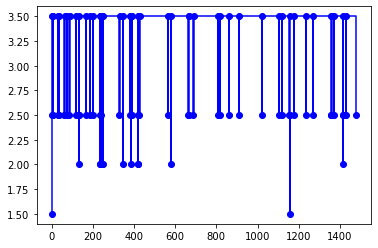

In [7]:
# Compute and plot the evolution of the potential along the simulated 
# path of the chain

# store the potential value at each step of the simulation
potentials = np.zeros(n_steps)
for step in range(n_steps):
    x_id = states[step]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    for i, j in G.edges:
        potentials[step] += pot[x[i],x[j]]
    potentials[step] /= 2

print("Potential along the simulated path of the chain:\n\n")
for t in range(n_steps):
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    print("Jump step " + str(t))
    print("state:")
    df = pd.DataFrame(data=x, index=np.arange(len(G)), columns=['state'])
    df.index.name = 'player'
    display(df)
    print("POTENTIAL:", potentials[t])
    print()

plt.step(transition_times, potentials, 'bo-', where="post");

Jump step 0
state:


state
player       
0           1
1           0
2           1
3           0
4           0


Jump step 1
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 2
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 3
state:


state
player       
0           0
1           0
2           0
3           0
4           1


Jump step 4
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 5
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 6
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 7
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 8
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 9
state:


state
player       
0           0
1           0
2           0
3           0
4           1


Jump step 10
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 11
state:


state
player       
0           0
1           0
2           0
3           0
4           1


Jump step 12
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 13
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 14
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 15
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 16
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 17
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 18
state:


state
player       
0           1
1           1
2           0
3           0
4           0


Jump step 19
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 20
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 21
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 22
state:


state
player       
0           0
1           0
2           0
3           0
4           0


Jump step 23
state:


state
player       
0           1
1           0
2           0
3           0
4           0


Jump step 24
state:


state
player       
0           0
1           0
2           0
3           0
4           0

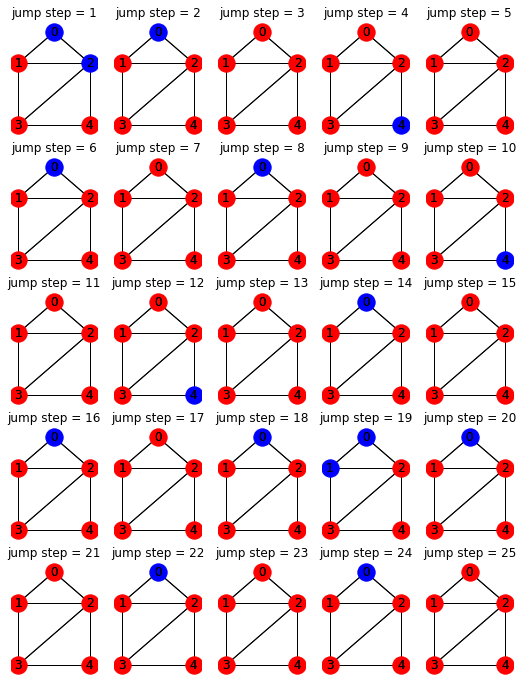

In [8]:
# To better understand the process, visualize the 
# evolution of the game's configuration in time

import matplotlib.pyplot as plt

# Plot the evolution of the game's configurations
fig = plt.figure(figsize=(9,12))
for t in range(0,min(n_steps,25)):
    plt.subplot(5,5,t+1)
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    print("Jump step " + str(t))
    print("state:")
    df = pd.DataFrame(data=x, index=np.arange(len(G)), columns=['state'])
    df.index.name = 'player'
    display(df)
    print()
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))

We can see that the potential during most of the
time is at its maximum value, corresponding to all nodes choosing the
same action. By repeating the simulation, it seems like all nodes tend
to end up in the same state after long time, independently of the initialization. The asymptotic state consists equally often in that all nodes
choose action 0 as that all nodes choose action 1.

We know from the theory that <span style="background-color: #00FFFF">the noisy best response dynamics operates a selection among the NE and concentrates, in the small noise limit, most of the probability of its invariant distribution in the subset of those Nash equilibria that correspond to the set of potential maximizers</span> 

$$\arg \max_{x \in \mathcal X} \Phi(x)$$ 

With the current choice for $a,b,c,d$ the maximum value of the potential $\Phi$ is realized by both the all-one and all-zero configurations.

In this example we have a fixed noisy parameter $\eta = 2$ but we are still able to observe that the dynamics spends most part of the time in global maxima of the potential. This can be evaluated for instance by computing the average of the potential function along the trajectory.

In [9]:
intervals = np.diff(transition_times, n=1, append = transition_times[-1] + t_next)
avg_potential = np.sum(intervals*potentials)/(transition_times[-1] + t_next)
print("Average potential:", avg_potential)
print("Max potential:", np.max(potentials))

Average potential: 3.474683043728634
Max potential: 3.5
